# Approximation

<div class="alert alert-block alert-info">
    <img style="float: right;" src="https://raw.githubusercontent.com/OpenSourceEconomics/ose-corporate-design/master/logos/OSE_logo_RGB.svg" width="150">
    <u><h1>Setup</h1></u>
</div>

In many computational economics applications, we need to replace an analytically intractable function $f : R^n \rightarrow R$ with a numerically tractable approximation $\hat{f}$. In some applications, f can be evaluated at any point of its domain, but with difficulty, and we wish to replace it with an approximation $\hat{f}$ that is easier to work with.

We study interpolation, a general strategy for forming a tractable approximation to a function that can be evaluated at any point of its domain. Consider a real-valued function $f$ defined on an interval of the real line that can be evaluated at any point of its domain.

Generally, we will approximate $f$ using a function $\hat{f}$ that is a finite linear combination of n known basis functions $\phi_1, \phi_2, ..., \phi_n$ of our choosing:

\begin{align*}
f(x) \approx \hat{f}(x) \equiv \sum_{j=1}^n c_j \phi_j(x).
\end{align*}

We will fix the n basis coefficients $c_1 , c_2 , ... , c_n$ by requiring $\hat{f}$ to interpolate, that is, agree with $f$ , at $n$ interpolation nodes $x_1 , x_2 , ... , x_n$ of our choosing. 

The most readily recognizable basis is the monomial basis:

\begin{align*}
\phi_0(x) &= 1 \\
\phi_1(x) &= x \\
\phi_2(x) &= x^2 \\
. \\
\phi_n(x)& x^n
\end{align*}

This can be used to construct the polynomial approximations:

\begin{align*}
f(x) \approx \hat{f}(x) \equiv c_0 + c_1 x +  c_2 x^2 +  ... c_n x^n
\end{align*}

There are other basis functions with more desirable properties and there are many different ways to choose the interpolation nodes.

Regardless of how the $n$ basis functions and nodes are chosen, computing the basis coefficients reduces to solving a linear equation.

\begin{align*}
\sum_{j=1}^n = c_j \phi_j(x) = f(x), \qquad i = 1, ..., n
\end{align*}

Interpolation schemes differ only in how the basis functions $\phi_j$ and interpolation nodes $x_j$ are chosen.




In [1]:
import matplotlib.pyplot as plt
import numpy as np

from approximation_auxiliary import compute_interpolation_error
from approximation_auxiliary import get_chebyshev_nodes
from approximation_auxiliary import get_uniform_nodes

from approximation_plots import plot_reciprocal_exponential
from approximation_plots import plot_approximation_nodes
from approximation_plots import plot_basis_functions
from approximation_plots import plot_runge_multiple
from approximation_plots import plot_problem_runge

from approximation_problems import problem_reciprocal_exponential
from approximation_problems import problem_runge

<div class="alert alert-block alert-info">
    <u><h2>Polynomial interpolation</h2></u>
</div>

The Weierstrass Theorem asserts that any continuous real-valued function can be approximated to an arbitrary degree of accuracy over a bounded interval by a polynomial.

Specifically, if $f$ is continuous on $[a, b]$ and $\epsilon > 0$, then there exists a polynomial $p$ such that 

\begin{align*}
\max_{x\in[a, b]} |f(x) - p(x)| < \epsilon
\end{align*}

* How to find a polynomial that provides a desired degree of accuracy?

* What degree of the polynomial is required?


###  Naive polynomial interpolation

Let's start with a basic setup, where we use the monomial basis and a uniform grid.

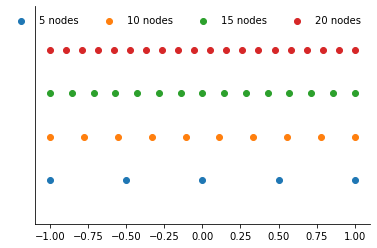

In [2]:
plot_approximation_nodes([5, 10, 15, 20], strategy="uniform")

Now we can get a look at the interpolation nodes.

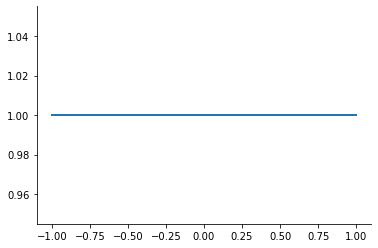

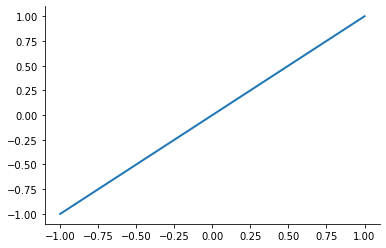

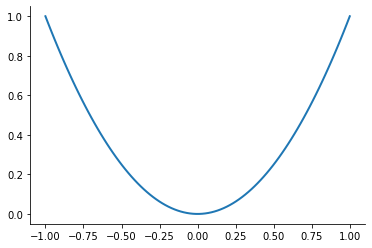

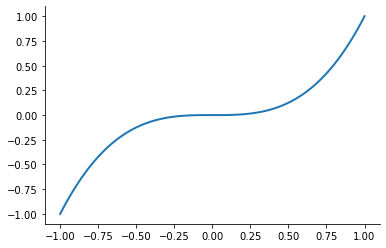

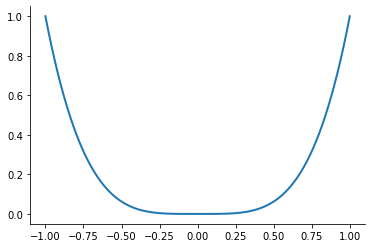

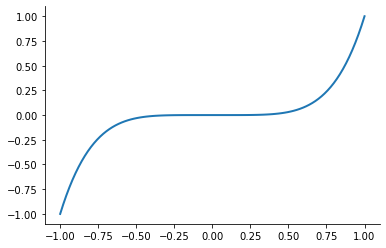

In [3]:
plot_basis_functions("monomial")

In [4]:
??get_uniform_nodes

Signature: get_uniform_nodes(n, a=-1, b=1)
Docstring: <no docstring>
Source:   
def get_uniform_nodes(n, a=-1, b=1):

    nodes = np.tile(np.nan, n)

    for i in range(1, n + 1):
        nodes[i - 1] = a + (i - 1) / (n - 1) * (b - a)

    return nodes
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/approximation/approximation_auxiliary.py
Type:      function


Let's look at the performance of this approach for the Runge function for $x\in[0, 1]$.

\begin{align*}
f(x) = \frac{1}{(1 + 25 x^2)}
\end{align*}

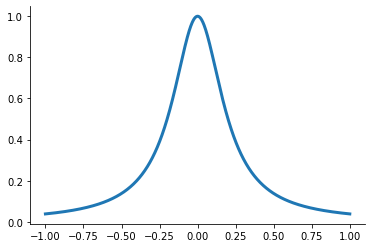

In [5]:
plot_problem_runge()

In [6]:
# TODO: link to conveninece class.

In [7]:
def get_order_five_interpolation():

    xvalues = np.linspace(-1, 1, 500)
    xnodes = np.linspace(-1, 1, 5)
    # how degreejust -1
    poly = np.polyfit(xnodes, problem_runge(xnodes), 5)
    # Cna I use class nore epxlit, live poly.eval(....)
    yfit = np.polyval(poly, xvalues)

    return yfit, xvalues


yfit, xvalues = get_order_five_interpolation()

/home/peisenha/local/anaconda3/envs/ose-course-scientific-computing/lib/python3.7/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


<div class="alert alert-success">
    <h3>Questions</h3>  
     <ul>
  <li>Why the warnings?</li>
    </ul> 
</div>

Now we are read to plot it against the true function.

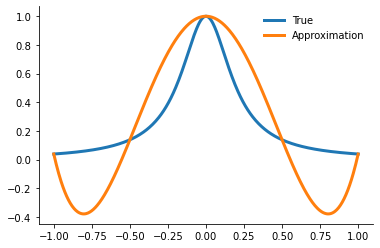

In [8]:
fig, ax = plt.subplots()
ax.plot(xvalues, problem_runge(xvalues), label="True")
ax.plot(xvalues, yfit, label="Approximation")
ax.legend()

We evaluate the error in our approximation by the  XXXXXXX.

In [9]:
compute_interpolation_error(yfit - problem_runge(xvalues))

-0.3581775568125518

<div class="alert alert-warning">
    <h3>Exercises</h3>  
     <ul>
      <li> Generalize the function to allow to approximate the function with a polynomial of generic degree.</li>
      <li> How does the quality of the approximation change as we increase the number of interpolation points.</li>         
    </ul> 
</div>

/home/peisenha/local/anaconda3/envs/ose-course-scientific-computing/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/home/peisenha/local/anaconda3/envs/ose-course-scientific-computing/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


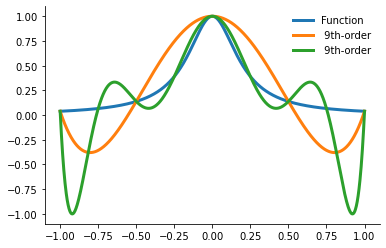

In [10]:
plot_runge_multiple()

What can be done? First we explore a different way to choose the the nodes.

In [11]:
??get_chebyshev_nodes

Signature: get_chebyshev_nodes(n, a=-1, b=1)
Docstring: <no docstring>
Source:   
def get_chebyshev_nodes(n, a=-1, b=1):

    nodes = np.tile(np.nan, n)

    for i in range(1, n + 1):
        nodes[i - 1] = (a + b) / 2 + ((b - a) / 2) * np.cos(((n - i + 0.5) / n) * np.pi)

    return nodes
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/approximation/approximation_auxiliary.py
Type:      function


We can see how the Chebychev nodes spread out differently than the evenly spaced nodes.

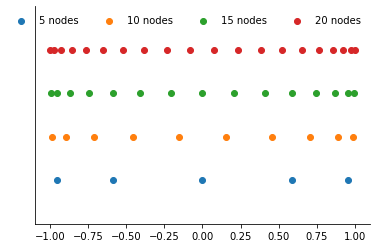

In [12]:
plot_approximation_nodes([5, 10, 15, 20], strategy="chebychev")

In [13]:
def get_interpolation_grid(num_nodes, degree, xvals, func, strategy="uniform"):

    a, b = min(xvals), max(xvals)

    if strategy == "uniform":
        get_nodes = get_uniform_nodes
    elif strategy == "chebychev":
        get_nodes = get_chebyshev_nodes

    xnodes = get_nodes(num_nodes, a, b)
    c = np.polyfit(xnodes, func(xnodes), num_nodes)
    yfit = np.polyval(c, xvals)

    return yfit


num_nodes, degree, xvals, func, strategy = (
    10,
    10,
    np.linspace(-5, 5),
    problem_reciprocal_exponential,
    "uniform",
)
stat = get_interpolation_grid(num_nodes, degree, xvals, func, strategy)[0]
np.testing.assert_almost_equal(stat, 148.41315910257697)

/home/peisenha/local/anaconda3/envs/ose-course-scientific-computing/lib/python3.7/site-packages/ipykernel_launcher.py:24: RankWarning: Polyfit may be poorly conditioned


/home/peisenha/local/anaconda3/envs/ose-course-scientific-computing/lib/python3.7/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/home/peisenha/local/anaconda3/envs/ose-course-scientific-computing/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


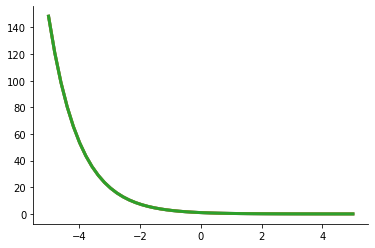

In [15]:
num_nodes, degree = 10, 10
fig, ax = plt.subplots()

yvals = np.linspace(-1, 1)
ax.plot(xvals, problem_reciprocal_exponential(xvals))
ax.plot(xvals, get_interpolation_grid(num_nodes, degree, xvals, func, strategy))
ax.plot(xvals, get_interpolation_grid(num_nodes, degree, xvals, func, "chebychev"))

In [ ]:
err_uniform = get_interpolation_grid(
    num_nodes, degree - 1, xvals, func, "uniform"
) - problem_reciprocal_exponential(xvals)

err_chebychev = get_interpolation_grid(
    num_nodes, degree - 1, xvals, func, "chebychev"
) - problem_reciprocal_exponential(xvals)


fig, ax = plt.subplots()

yvals = np.linspace(a, b)
ax.plot(xvals, err_chebychev)
ax.plot(xvals, err_uniform)

Let's see how the two compare on a test function.

In [ ]:
??problem_reciprocal_exponential

In [ ]:
plot_basis_functions("chebychev")

### Research

*

### Resources

* https://relate.cs.illinois.edu/course/cs450-f18/file-version/a7a1965adf0479d36f1a34889afe55e2ec61a532/demos/upload/07-interpolation/Chebyshev%20interpolation.html

* https://www.unioviedo.es/compnum/labs/PYTHON/Interpolation.html

* https://www.johndcook.com/blog/2017/11/06/chebyshev-interpolation/

* https://numpy.org/devdocs/reference/routines.polynomials.html

### References

* 